# Loan Approval Prediction

In [139]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [140]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [141]:
cat_var = [col for col in df.columns if df[col].dtypes == 'object']
print("Categorical variables : " , cat_var)


Categorical variables :  ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


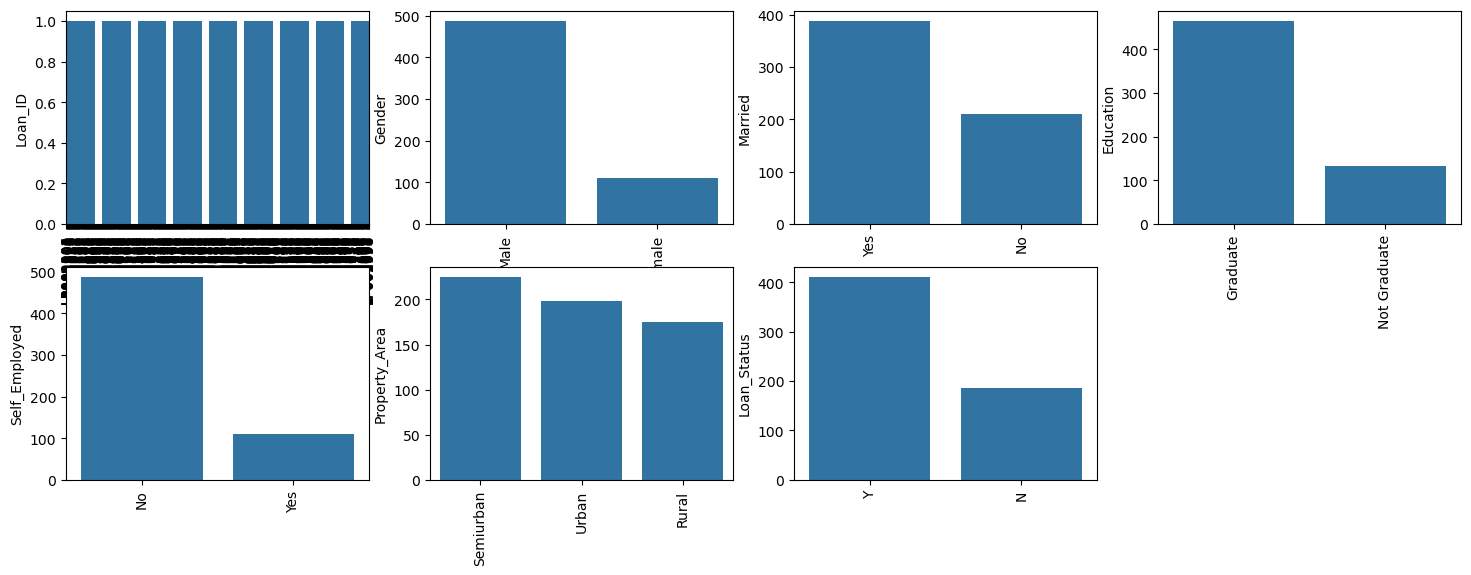

In [142]:
plt.figure(figsize=(18,36))
index = 1
for col in cat_var: 
    y = df[col].value_counts()
    plt.subplot(11,4,index) 
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index) , y=y)
    index += 1

In [154]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
cat_var = [col for col in df.columns if df[col].dtypes == 'object']
for col in cat_var:
  df[col] = label_encoder.fit_transform(df[col])


In [155]:
print("Categorical var : " , len(cat_var))

Categorical var :  0


<Axes: >

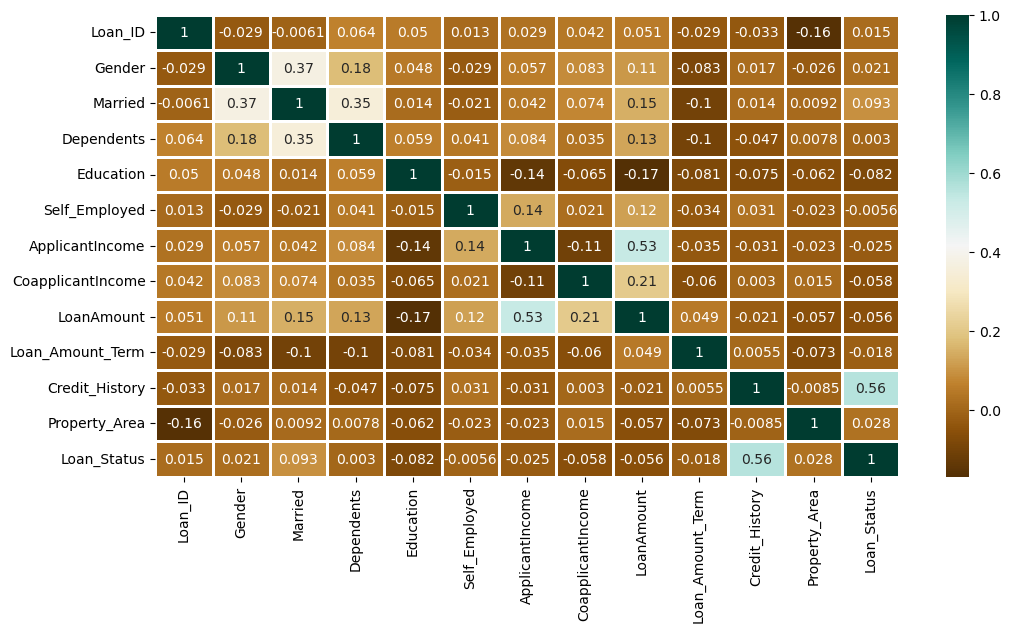

In [156]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',linewidths=2,annot=True)

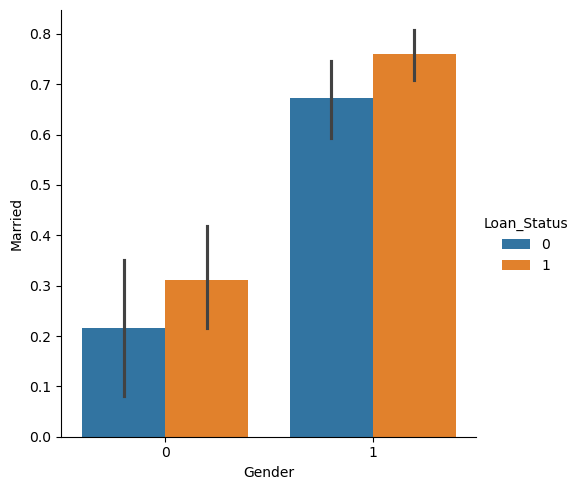

In [157]:
sns.catplot(x='Gender' , y='Married' , hue='Loan_Status',kind='bar',data=df)

In [158]:
for col in df.columns: 
    df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
from sklearn.model_selection import train_test_split 

X=df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

X.shape , y.shape
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.4,random_state = 1)

X_train.shape , X_test.shape,y_train.shape , y_test.shape

((358, 12), (240, 12), (358,), (240,))

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# Train Data
for clf in (rfc,knn,svc,lc): 
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    print('Accuarcy Score of ' ,  clf.__class__.__name__ , "=" , 100 * acc)


Accuarcy Score of  RandomForestClassifier = 77.08333333333334
Accuarcy Score of  KNeighborsClassifier = 63.74999999999999
Accuarcy Score of  SVC = 69.16666666666667
Accuarcy Score of  LogisticRegression = 78.33333333333333


In [168]:
# test dataset 

for clf in (rfc,knn,svc,lc):
    clf.fit(X_train,y_train)
    y_pred  = clf.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    print("Acc Score of " , clf.__class__.__name__ , '=' , acc)

Acc Score of  RandomForestClassifier = 0.7708333333333334
Acc Score of  KNeighborsClassifier = 0.6375
Acc Score of  SVC = 0.6916666666666667
Acc Score of  LogisticRegression = 0.7833333333333333
